In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [128]:
data = fetch_california_housing(as_frame=True)
x = data.data
y = data.target


In [129]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [130]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [131]:
x_train.shape

(16512, 8)

In [132]:
x_train.duplicated().sum()

np.int64(0)

In [133]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [76]:
x_train

array([[-0.326196  ,  0.34849025, -0.17491646, ...,  0.05137609,
        -1.3728112 ,  1.27258656],
       [-0.03584338,  1.61811813, -0.40283542, ..., -0.11736222,
        -0.87669601,  0.70916212],
       [ 0.14470145, -1.95271028,  0.08821601, ..., -0.03227969,
        -0.46014647, -0.44760309],
       ...,
       [-0.49697313,  0.58654547, -0.60675918, ...,  0.02030568,
        -0.75500738,  0.59946887],
       [ 0.96545045, -1.07984112,  0.40217517, ...,  0.00707608,
         0.90651045, -1.18553953],
       [-0.68544764,  1.85617335, -0.85144571, ..., -0.08535429,
         0.99543676, -1.41489815]])

# step 1. Linear Reg

In [23]:
x_test.shape

(4128, 8)

In [61]:
from sklearn.linear_model import LinearRegression

In [135]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred1 = lr.predict(x_test)
r2_score1 = r2_score(y_test,y_pred1)
print(r2_score1)

0.575787706032451


In [24]:
adj_r2_score1 = 1 - ((1 - r2_score1)*(4128 - 1))/(4128 - 8 - 1)
print(adj_r2_score1)    # ----> no unwanted columns in dataset

0.574963792861356


In [26]:
len(y_test)

4128

In [30]:
n = len(y_test)
k = x_test.shape[1]

y_mean = np.mean(y_test)
ss_total = np.sum((y_test - y_mean) ** 2)
ss_residual = np.sum((y_test - y_pred1) ** 2)
ss_regression = np.sum((y_pred1 - y_mean) ** 2)

msr = ss_regression / k
mse = ss_residual / (n - k - 1)

F_statistic = msr / mse
print("F-statistic:", F_statistic)  # ----> p_value <<<< 0.5


F-statistic: 777.3806942258136


### using statsmodel library

In [28]:
import statsmodels.api as sm

x_train_sm = sm.add_constant(x_train)

model = sm.OLS(y_train, x_train_sm).fit()

print(model.summary())

# there is some overfitting

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     3261.
Date:                Sun, 25 May 2025   Prob (F-statistic):               0.00
Time:                        08:03:44   Log-Likelihood:                -17998.
No. Observations:               16512   AIC:                         3.601e+04
Df Residuals:                   16503   BIC:                         3.608e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0719      0.006    369.848      0.0

# Gradint descent

In [35]:
from sklearn.linear_model import SGDRegressor


In [114]:

model = SGDRegressor(
    loss='squared_error',
    learning_rate='constant',
    eta0=0.01,
    early_stopping=True,
    max_iter=1000
)
model.fit(x_train, y_train)

y_pred2 = model.predict(x_test)
r2_score2 = r2_score(y_test,y_pred2)  # overfitting
print(r2_score2)

-2.2192621272139534e+19


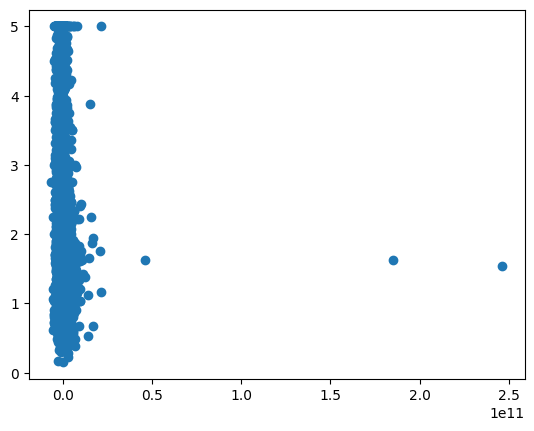

In [115]:
residual2 = y_test - y_pred2
plt.scatter(residual2, y_test)

(array([4.122e+03, 3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([-6.48933115e+09,  1.87852276e+10,  4.40597864e+10,  6.93343452e+10,
         9.46089039e+10,  1.19883463e+11,  1.45158021e+11,  1.70432580e+11,
         1.95707139e+11,  2.20981698e+11,  2.46256257e+11]),
 <BarContainer object of 10 artists>)

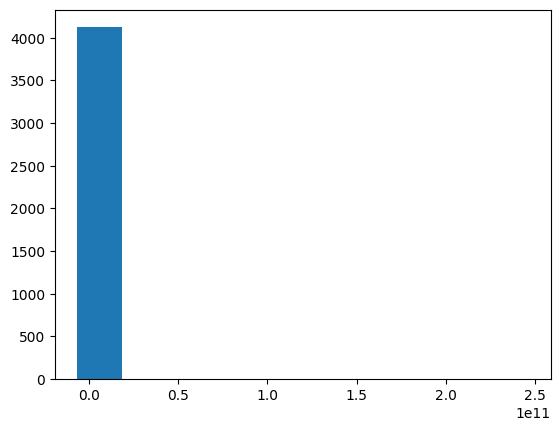

In [116]:
plt.hist(residual2)

In [49]:
x_test.shape

(4128, 8)

In [117]:
# f-stats

total_err = np.sum((y_test - np.mean(y_test))**2)
residual = np.sum((y_test - y_pred2)**2)
ess = np.sum((y_pred2 - np.mean(y_test))**2)


msr = ess / 8
mse = residual/(4128 - 8 - 1)

F_statistic = msr / mse
print("F-statistic:", F_statistic)

F-statistic: 514.8750000193161


# Polynomial regression --> adding extra dim

In [77]:
x_train.shape

(16512, 8)

In [118]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2,include_bias=False) # Total=original features (8)+squares (8)+cross terms (28)

x_train_trns = poly.fit_transform(x_train)
x_test_trns = poly.transform(x_test)

In [119]:
x_train_trns.shape

(16512, 44)

In [120]:
lr = LinearRegression()
lr.fit(x_train_trns,y_train)
y_pred3 = lr.predict(x_test_trns)
r2_score3 = r2_score(y_test,y_pred3)
print(r2_score3)

0.6456819729261979


(array([7.000e+00, 1.110e+02, 1.834e+03, 2.158e+03, 1.500e+01, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-4.80827794, -3.18858316, -1.56888837,  0.05080641,  1.67050119,
         3.29019597,  4.90989075,  6.52958553,  8.14928031,  9.7689751 ,
        11.38866988]),
 <BarContainer object of 10 artists>)

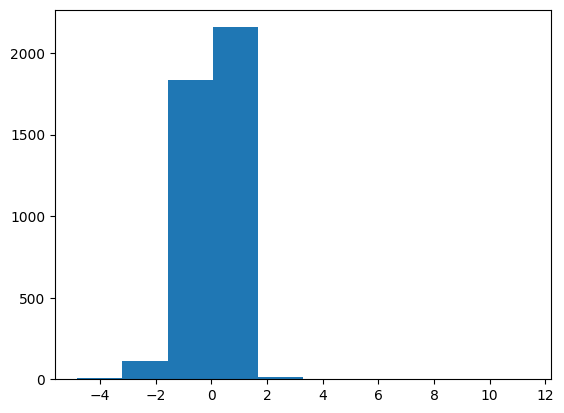

In [122]:
residual3 = y_pred3 - y_test
plt.hist(residual3)

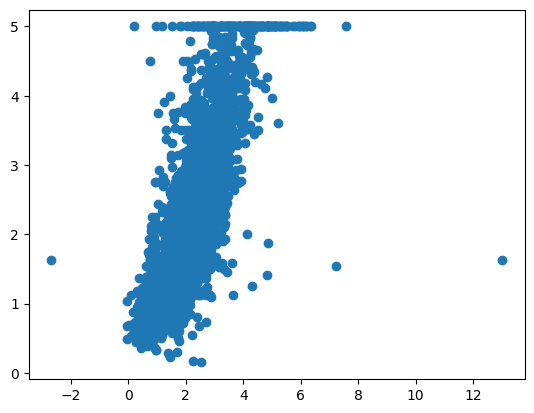

In [90]:
plt.scatter(y_pred3,y_test)

In [68]:
import statsmodels.api as sm

In [70]:
x_train_trns.shape

(16512, 45)

In [81]:
x_train_trns = sm.add_constant(x_train_trns)

model = sm.OLS(y_train, x_train_trns).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     814.9
Date:                Sun, 25 May 2025   Prob (F-statistic):               0.00
Time:                        08:54:18   Log-Likelihood:                -16282.
No. Observations:               16512   AIC:                         3.265e+04
Df Residuals:                   16467   BIC:                         3.300e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9566      0.012    168.549      0.0

# checking Assumptions

In [92]:
y.shape

(20640,)

#1. Linearity

### check linearity

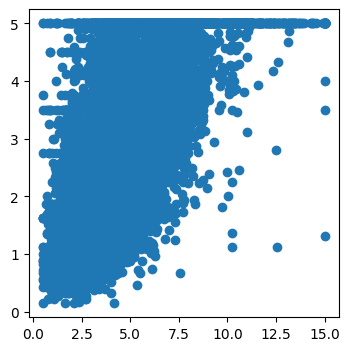

In [102]:
# by input output column relationship

plt.figure(figsize=(4,4))
plt.scatter(x.iloc[:,0],y)


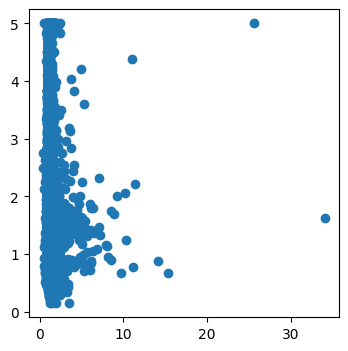

In [103]:
plt.figure(figsize=(4,4))
plt.scatter(x.iloc[:,3],y)


# normality of residual

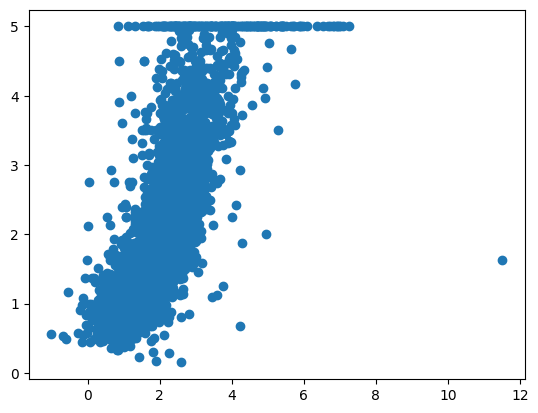

In [104]:
# by residual scatter around zero

lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred1 = lr.predict(x_test)

plt.scatter(y_pred1,y_test)

# Homoscedastic

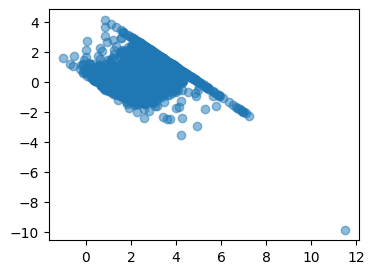

In [137]:
# vif = 1/(1-r2)

lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred4 = lr.predict(x_test)
residual = y_test - y_pred4

plt.figure(figsize=(4,3))
plt.scatter(y_pred4, residual, alpha=0.5)

# ----> its clearly Heteroscedasticity
# spread of residual are not constant

In [138]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

model = LinearRegression()
model.fit(x_train_poly, y_train)


LinearRegression()

In [140]:
y_pred5 = model.predict(x_test_poly)
print(r2_score(y_test , y_pred5))

0.6456819729261979


# Multicollinearity

# 1. correlation

In [123]:
corr_matrix = x.corr()

In [124]:
corr_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


<Axes: >

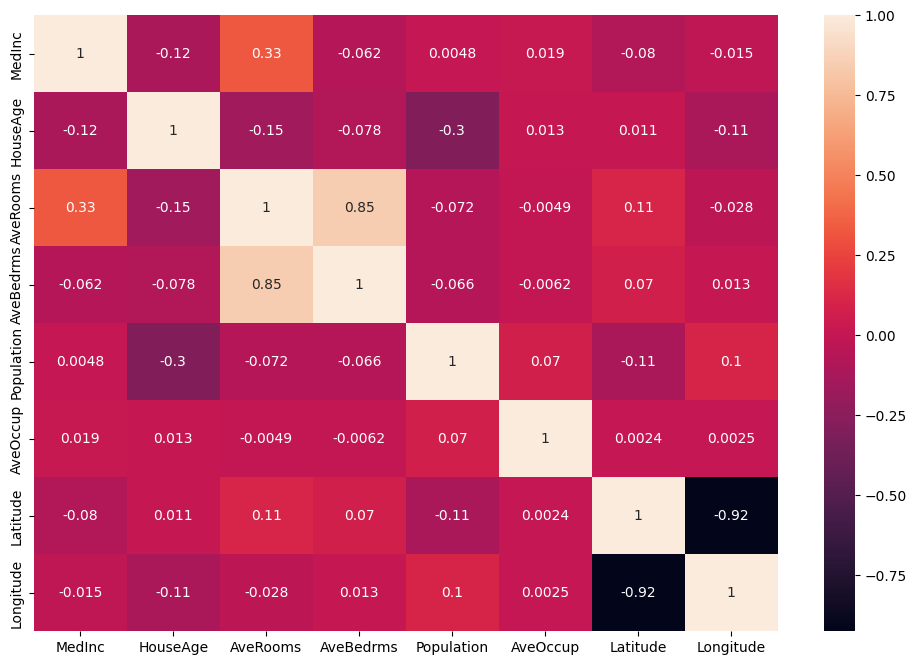

In [125]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True)  # --------------> no multicollinarity

### 2. VIF

In [127]:
# vif = 1/(1-r2)

lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred4 = lr.predict(x_test)
r2_score4 = r2_score(y_test,y_pred4)

vif = 1/(1-r2_score4)
print(vif)  # --------------> no multicollinarity

2.357310276529838


# accuracy still around 0.60


# Feature selection

In [143]:
x.shape # due to 8 input columns we can apply efs

(20640, 8)

In [151]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [152]:
lr = LinearRegression()
sfs = SFS(lr, k_features='best', forward=True, floating=False, scoring='r2',cv=5)

sfs.fit(x_train, y_train)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 8),
                          scoring='r2')

In [153]:
sfs.k_feature_idx_ # best accuracy when taking all

(0, 1, 2, 3, 5, 6, 7)

# Regularization

In [201]:

from sklearn.linear_model import SGDRegressor,Ridge,Lasso

# Ridge

In [207]:

#  penalty = l2 = ridge // eta = 0.1 = learning_rate + constant --->  not learning schedule
sgd = SGDRegressor(penalty='l2',max_iter=500,eta0=0.1,learning_rate='constant',alpha=1)


In [208]:
sgd.fit(x_train, y_train)

y_pred = sgd.predict(x_test)
print("r2_score : ",r2_score(y_test,y_pred))
print(sgd.coef_)
print(sgd.intercept_)

r2_score :  0.3559333524602909
[ 0.48432773  0.18181107  0.15097056 -0.00256114  0.201751   -0.01327798
  0.04394714 -0.14359792]
[2.15498572]


# Lasso

In [232]:

lasso = Lasso(alpha=0.001)
lasso.fit(x_train, y_train)


Lasso(alpha=0.001)

In [233]:

y_pred_lr = lasso.predict(x_test)
print("Ridge R² score:", r2_score(y_test, y_pred_lr))



Ridge R² score: 0.5768562568705682


# Using regularization with polynomial transformation

# highest accuracy

In [234]:
poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

lasso = Lasso(alpha=0.001)
lasso.fit(x_train_poly, y_train)
y_pred_lr = lasso.predict(x_test_poly)
print("Ridge R² score:", r2_score(y_test, y_pred_lr))



Ridge R² score: 0.6686741743527655


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.393e+03, tolerance: 2.207e+00
  model = cd_fast.enet_coordinate_descent(


# PCA

In [247]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [245]:
from sklearn.decomposition import PCA

In [255]:
pca = PCA(n_components=6)
x_pca = pca.fit_transform(x)


In [256]:
x_pca

array([[-1.10351265e+03,  8.56663624e+00, -7.74104267e-01,
         3.55896355e+00,  2.73671858e+00,  3.74666242e+00],
       [ 9.75541244e+02, -4.67041774e+00, -1.02568060e+00,
         3.94605936e+00,  1.64756479e+00,  3.91094740e+00],
       [-9.29549908e+02,  2.00346509e+01, -1.97273701e+00,
         3.90347639e+00,  3.96784052e+00,  2.26989335e+00],
       ...,
       [-4.18437575e+02, -1.29082558e+01,  1.01901295e+00,
         3.51108761e+00, -2.58145839e+00, -1.75428879e+00],
       [-6.84439525e+02, -1.27945805e+01,  9.74409305e-01,
         3.53335100e+00, -2.42779622e+00, -1.63168668e+00],
       [-3.84362474e+01, -1.26703781e+01,  1.04286818e+00,
         3.63115237e+00, -2.19840471e+00, -1.17996360e+00]])

In [257]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(x_pca,y,test_size=0.2,random_state=42)

In [258]:
lr = LinearRegression()

lr.fit(x_train2,y_train2)

pred = lr.predict(x_test2)
r2_score(y_test2,pred)   # no effect of PCA

0.5107042112504795